In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
df = pd.read_csv('/content/drive/Shareddrives/Sentiment analysis dataset/training.1600000.processed.noemoticon.csv',  encoding ='ISO-8859-1', names=['target', 'id', 'date', 'flag', 'user', 'text'])

In [4]:
df_subset = df.sample(n=50000, random_state=42)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df_subset['text'], df_subset['target'], test_size=0.2, random_state=42)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [8]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train_vect, y_train)

DecisionTreeClassifier(max_depth=5)

In [10]:
y_pred = clf.predict(X_test_vect)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion matrix:\n", cm)

Accuracy: 0.556
Confusion matrix:
 [[4715  262]
 [4178  845]]


In [12]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns

Text(50.722222222222214, 0.5, 'y_pred')

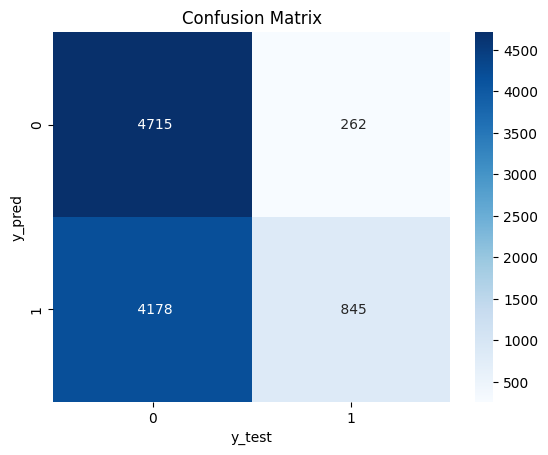

In [13]:
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.95      0.68      4977
           4       0.76      0.17      0.28      5023

    accuracy                           0.56     10000
   macro avg       0.65      0.56      0.48     10000
weighted avg       0.65      0.56      0.48     10000

